In [ ]:
#Hypothesis
#If people with Alzheimer deasis stay active, then their well-being improves.

#Null Hypothesis
#The well-being of physically active patients stays the same or gets worse.

#Alternative Hypothesis
#The well-being of physically active patients improves.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from scipy.stats import linregress

In [3]:
kaggle_data_df = pd.read_csv("resources/kaggle_alz.csv")
kaggle_data_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2020,2020,HI,Hawaii,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,5064,OVERALL,OVERALL
1,2017,2017,ID,Idaho,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C05,TMC03,Q27,16,AGE,5064,OVERALL,OVERALL
2,2017,2017,ID,Idaho,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C01,TOC11,Q43,16,AGE,5064,OVERALL,OVERALL
3,2018,2018,ID,Idaho,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,...,NaN,POINT (-114.36373 43.68263001),C01,TOC01,Q08,16,AGE,5064,OVERALL,OVERALL
4,2020,2020,IN,Indiana,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,Male,POINT (-86.14996019 39.76691045),C05,TMC03,Q27,18,AGE,AGE_OVERALL,GENDER,MALE


In [4]:
kaggle_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214462 entries, 0 to 214461
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  214462 non-null  int64  
 1   YearEnd                    214462 non-null  int64  
 2   LocationAbbr               214462 non-null  object 
 3   LocationDesc               214462 non-null  object 
 4   Datasource                 214462 non-null  object 
 5   Class                      214462 non-null  object 
 6   Topic                      214462 non-null  object 
 7   Question                   214462 non-null  object 
 8   Data_Value_Unit            214462 non-null  object 
 9   DataValueTypeID            214462 non-null  object 
 10  Data_Value_Type            214462 non-null  object 
 11  Data_Value                 144629 non-null  float64
 12  Data_Value_Alt             144629 non-null  float64
 13  Low_Confidence_Limit       14

In [5]:
filtered_db = kaggle_data_df.loc[((kaggle_data_df['QuestionID'] =="Q32") | (kaggle_data_df['QuestionID'] =="Q35")) & ((kaggle_data_df['StratificationCategoryID1'] =="AGE") & (kaggle_data_df['StratificationID1'] =="AGE_OVERALL")) & ((kaggle_data_df['StratificationCategoryID2'] =="OVERALL") & (kaggle_data_df['StratificationID2'] =="OVERALL"))]
filtered_db.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
90,2016,2016,AK,Alaska,BRFSS,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,Number,MEAN,...,NaN,POINT (-147.722059 64.84507996),C01,TOC03,Q35,2,AGE,AGE_OVERALL,OVERALL,OVERALL
542,2016,2016,AK,Alaska,BRFSS,Overall Health,Self-rated health (fair to poor health),Percentage of older adults who self-reported t...,%,PRCTG,...,NaN,POINT (-147.722059 64.84507996),C01,TOC07,Q32,2,AGE,AGE_OVERALL,OVERALL,OVERALL
613,2017,2017,AL,Alabama,BRFSS,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,Number,MEAN,...,NaN,POINT (-86.63186076 32.84057112),C01,TOC03,Q35,1,AGE,AGE_OVERALL,OVERALL,OVERALL
741,2019,2019,AL,Alabama,BRFSS,Overall Health,Self-rated health (fair to poor health),Percentage of older adults who self-reported t...,%,PRCTG,...,NaN,POINT (-86.63186076 32.84057112),C01,TOC07,Q32,1,AGE,AGE_OVERALL,OVERALL,OVERALL
913,2019,2019,AZ,Arizona,BRFSS,Overall Health,Self-rated health (fair to poor health),Percentage of older adults who self-reported t...,%,PRCTG,...,NaN,POINT (-111.7638113 34.86597028),C01,TOC07,Q32,4,AGE,AGE_OVERALL,OVERALL,OVERALL


In [6]:
reduced_columns_less_active_df = filtered_db[['YearStart', 'LocationDesc', 'Geolocation', 'Data_Value_Unit', 'Data_Value', 'QuestionID', 'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2']]
reduced_columns_less_active_df.reset_index(drop=True, inplace=True)
reduced_columns_less_active_df

,YearStart,LocationDesc,Geolocation,Data_Value_Unit,Data_Value,QuestionID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2016,Alaska,POINT (-147.722059 64.84507996),Number,5.2,Q35,AGE,AGE_OVERALL,OVERALL,OVERALL
1,2016,Alaska,POINT (-147.722059 64.84507996),%,19.2,Q32,AGE,AGE_OVERALL,OVERALL,OVERALL
2,2017,Alabama,POINT (-86.63186076 32.84057112),Number,8.3,Q35,AGE,AGE_OVERALL,OVERALL,OVERALL
3,2019,Alabama,POINT (-86.63186076 32.84057112),%,31.1,Q32,AGE,AGE_OVERALL,OVERALL,OVERALL
4,2019,Arizona,POINT (-111.7638113 34.86597028),%,23.8,Q32,AGE,AGE_OVERALL,OVERALL,OVERALL
...,...,...,...,...,...,...,...,...,...,...
691,2018,Wyoming,POINT (-108.1098304 43.23554134),Number,6.0,Q35,AGE,AGE_OVERALL,OVERALL,OVERALL
692,2016,Wyoming,POINT (-108.1098304 43.23554134),Number,6.1,Q35,AGE,AGE_OVERALL,OVERALL,OVERALL
693,2015,Wyoming,POINT (-108.1098304 43.23554134),Number,6.7,Q35,AGE,AGE_OVERALL,OVERALL,OVERALL
694,2016,Wyoming,POINT (-108.1098304 43.23554134),%,20.6,Q32,AGE,AGE_OVERALL,OVERALL,OVERALL


In [7]:
reduced_columns_less_active_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  696 non-null    int64  
 1   LocationDesc               696 non-null    object 
 2   Geolocation                636 non-null    object 
 3   Data_Value_Unit            696 non-null    object 
 4   Data_Value                 696 non-null    float64
 5   QuestionID                 696 non-null    object 
 6   StratificationCategoryID1  696 non-null    object 
 7   StratificationID1          696 non-null    object 
 8   StratificationCategoryID2  696 non-null    object 
 9   StratificationID2          696 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 54.5+ KB


In [8]:
less_active_poor_health_df = reduced_columns_less_active_df.pivot_table(index=['YearStart', 'LocationDesc', 'Geolocation',  'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2'], columns='QuestionID', values = 'Data_Value').reset_index()
less_active_poor_health_df

QuestionID,YearStart,LocationDesc,Geolocation,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,Q32,Q35
0,2015,Alabama,POINT (-86.63186076 32.84057112),AGE,AGE_OVERALL,OVERALL,OVERALL,30.0,7.7
1,2015,Alaska,POINT (-147.722059 64.84507996),AGE,AGE_OVERALL,OVERALL,OVERALL,19.5,5.7
2,2015,Arizona,POINT (-111.7638113 34.86597028),AGE,AGE_OVERALL,OVERALL,OVERALL,23.8,6.4
3,2015,Arkansas,POINT (-92.27449074 34.74865012),AGE,AGE_OVERALL,OVERALL,OVERALL,34.4,8.2
4,2015,California,POINT (-120.9999995 37.63864012),AGE,AGE_OVERALL,OVERALL,OVERALL,24.3,6.2
...,...,...,...,...,...,...,...,...,...
313,2020,Virginia,POINT (-78.45789046 37.54268067),AGE,AGE_OVERALL,OVERALL,OVERALL,18.7,5.9
314,2020,Washington,POINT (-120.4700108 47.52227863),AGE,AGE_OVERALL,OVERALL,OVERALL,16.7,5.8
315,2020,West Virginia,POINT (-80.71264013 38.6655102),AGE,AGE_OVERALL,OVERALL,OVERALL,29.9,7.8
316,2020,Wisconsin,POINT (-89.81637074 44.39319117),AGE,AGE_OVERALL,OVERALL,OVERALL,15.2,5.5


The r-value is: 0.7520299363574254


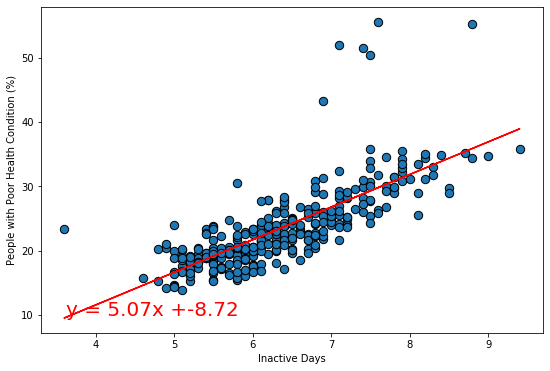

In [9]:

def linear_regression_plot(x_axis, y_axis):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    print(f"The r-value is: {rvalue}")
    reg_line = slope*x_axis + intercept
    fig = plt.figure(figsize =(9,6))
    ax = fig.add_subplot()
    plt.scatter(x_axis, y_axis, marker="o", s=70, edgecolors="black")
    plt.plot(x_axis,reg_line, color="r")
    
    #displaying regression equation on the chart
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))    
    ax.text(0.05, 0.1, line_eq, transform=ax.transAxes, fontsize=20, va='top', color='red')
 
    plt.rcParams['axes.labelsize'] = 14
    plt.xlabel("Inactive Days")
    plt.ylabel("People with Poor Health Condition (%)")
    plt.show()
    
    
    
linear_regression_plot(less_active_poor_health_df["Q35"], less_active_poor_health_df["Q32"])

In [10]:
population_state_df = pd.read_csv("resources/population.csv")
population_state_df

,States,Population
0,Alabama,4903185
1,Alaska,731545
2,Arizona,7278717
3,Arkansas,3017804
4,California,39512223
5,Colorado,5758736
6,Connecticut,3565287
7,Delaware,973764
8,Florida,21477737
9,Georgia,10617423


In [11]:
mortality_state_df = pd.read_csv("resources/mortal_by_states_2019.csv")
mortality_state_df.set_index("States")
mortality_state_df

,States,Mortality
0,AL,2659
1,AK,128
2,AZ,3047
3,AR,1507
4,CA,16859
5,CO,1909
6,CT,967
7,DE,339
8,FL,6539
9,GA,4221


In [12]:
merged_df = [[]]

In [13]:
merged_df = pd.merge(population_state_df, mortality_state_df, left_index=True, right_index=True)
merged_df.drop(columns=['States_y'])
merged_df

,States_x,Population,States_y,Mortality
0,Alabama,4903185,AL,2659
1,Alaska,731545,AK,128
2,Arizona,7278717,AZ,3047
3,Arkansas,3017804,AR,1507
4,California,39512223,CA,16859
5,Colorado,5758736,CO,1909
6,Connecticut,3565287,CT,967
7,Delaware,973764,DE,339
8,Florida,21477737,FL,6539
9,Georgia,10617423,GA,4221


In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   States_x    50 non-null     object
 1   Population  50 non-null     int64 
 2   States_y    50 non-null     object
 3   Mortality   50 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ KB


In [15]:
merged_df['Population'] = merged_df['Population'].astype('int64')

In [16]:
mortality_percent = (merged_df['Mortality']/(merged_df['Population']))*100
mortality_percent

0     0.054230
1     0.017497
2     0.041862
3     0.049937
4     0.042668
5     0.033150
6     0.027123
7     0.034813
8     0.030445
9     0.039755
10    0.033266
11    0.036372
12    0.031203
13    0.038041
14    0.042598
15    0.028799
16    0.037693
17    0.046571
18    0.040470
19    0.016739
20    0.024128
21    0.044729
22    0.045251
23    0.055844
24    0.045328
25    0.030502
26    0.039702
27    0.022012
28    0.037582
29    0.029599
30    0.027089
31    0.019292
32    0.042982
33    0.052883
34    0.044777
35    0.044858
36    0.047229
37    0.032417
38    0.043045
39    0.045118
40    0.055954
41    0.047619
42    0.034836
43    0.030568
44    0.050482
45    0.030824
46    0.047079
47    0.046425
48    0.041048
49    0.041122
dtype: float64

<BarContainer object of 50 artists>

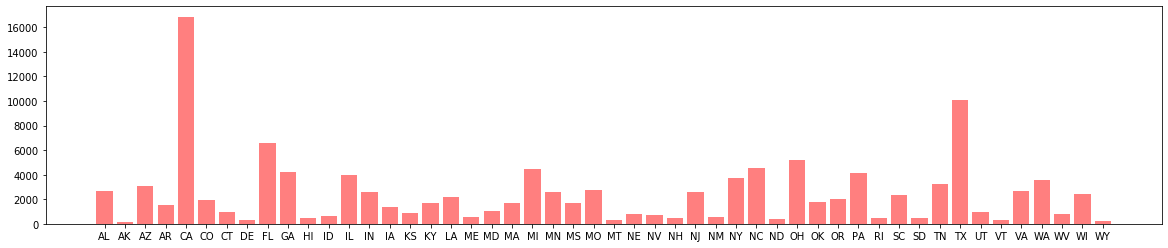

In [17]:
plt.figure(figsize=(20,4))
plt.bar(merged_df['States_y'], merged_df['Mortality'], color='r', alpha=0.5, align="center")

In [18]:
# Hypothesis by Gender

In [19]:
filtered_gender_db = kaggle_data_df.loc[((kaggle_data_df['QuestionID'] =="Q32") | (kaggle_data_df['QuestionID'] =="Q35")) & ((kaggle_data_df['StratificationCategoryID1'] =="AGE") & (kaggle_data_df['StratificationID1'] =="AGE_OVERALL")) & ((kaggle_data_df['StratificationCategoryID2'] =="GENDER") & ((kaggle_data_df['StratificationID2'] =="FEMALE") | (kaggle_data_df['StratificationID2'] =="MALE")))]
filtered_gender_db

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
15,2017,2017,KY,Kentucky,BRFSS,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,Number,MEAN,...,Male,POINT (-84.77497105 37.64597027),C01,TOC03,Q35,21,AGE,AGE_OVERALL,GENDER,MALE
387,2018,2018,AL,Alabama,BRFSS,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,Number,MEAN,...,Female,POINT (-86.63186076 32.84057112),C01,TOC03,Q35,1,AGE,AGE_OVERALL,GENDER,FEMALE
665,2020,2020,AZ,Arizona,BRFSS,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,Number,MEAN,...,Male,POINT (-111.7638113 34.86597028),C01,TOC03,Q35,4,AGE,AGE_OVERALL,GENDER,MALE
1157,2017,2017,AL,Alabama,BRFSS,Overall Health,Self-rated health (fair to poor health),Percentage of older adults who self-reported t...,%,PRCTG,...,Male,POINT (-86.63186076 32.84057112),C01,TOC07,Q32,1,AGE,AGE_OVERALL,GENDER,MALE
1681,2016,2016,AL,Alabama,BRFSS,Overall Health,Self-rated health (fair to poor health),Percentage of older adults who self-reported t...,%,PRCTG,...,Male,POINT (-86.63186076 32.84057112),C01,TOC07,Q32,1,AGE,AGE_OVERALL,GENDER,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213763,2019,2019,WY,Wyoming,BRFSS,Overall Health,Self-rated health (fair to poor health),Percentage of older adults who self-reported t...,%,PRCTG,...,Female,POINT (-108.1098304 43.23554134),C01,TOC07,Q32,56,AGE,AGE_OVERALL,GENDER,FEMALE
213865,2018,2018,WY,Wyoming,BRFSS,Overall Health,Self-rated health (fair to poor health),Percentage of older adults who self-reported t...,%,PRCTG,...,Female,POINT (-108.1098304 43.23554134),C01,TOC07,Q32,56,AGE,AGE_OVERALL,GENDER,FEMALE
213986,2016,2016,WY,Wyoming,BRFSS,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,Number,MEAN,...,Male,POINT (-108.1098304 43.23554134),C01,TOC03,Q35,56,AGE,AGE_OVERALL,GENDER,MALE
214013,2017,2017,WY,Wyoming,BRFSS,Overall Health,Self-rated health (fair to poor health),Percentage of older adults who self-reported t...,%,PRCTG,...,Male,POINT (-108.1098304 43.23554134),C01,TOC07,Q32,56,AGE,AGE_OVERALL,GENDER,MALE


In [20]:
reduced_columns_gender_df = filtered_gender_db[['YearStart', 'LocationDesc', 'Geolocation', 'Data_Value_Unit', 'Data_Value', 'QuestionID', 'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2']]
reduced_columns_gender_df.reset_index(drop=True, inplace=True)
reduced_columns_gender_df

,YearStart,LocationDesc,Geolocation,Data_Value_Unit,Data_Value,QuestionID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2017,Kentucky,POINT (-84.77497105 37.64597027),Number,8.7,Q35,AGE,AGE_OVERALL,GENDER,MALE
1,2018,Alabama,POINT (-86.63186076 32.84057112),Number,7.8,Q35,AGE,AGE_OVERALL,GENDER,FEMALE
2,2020,Arizona,POINT (-111.7638113 34.86597028),Number,6.3,Q35,AGE,AGE_OVERALL,GENDER,MALE
3,2017,Alabama,POINT (-86.63186076 32.84057112),%,32.6,Q32,AGE,AGE_OVERALL,GENDER,MALE
4,2016,Alabama,POINT (-86.63186076 32.84057112),%,30.5,Q32,AGE,AGE_OVERALL,GENDER,MALE
...,...,...,...,...,...,...,...,...,...,...
1387,2019,Wyoming,POINT (-108.1098304 43.23554134),%,19.8,Q32,AGE,AGE_OVERALL,GENDER,FEMALE
1388,2018,Wyoming,POINT (-108.1098304 43.23554134),%,18.9,Q32,AGE,AGE_OVERALL,GENDER,FEMALE
1389,2016,Wyoming,POINT (-108.1098304 43.23554134),Number,6.3,Q35,AGE,AGE_OVERALL,GENDER,MALE
1390,2017,Wyoming,POINT (-108.1098304 43.23554134),%,18.7,Q32,AGE,AGE_OVERALL,GENDER,MALE


In [21]:
reduced_columns_gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  1392 non-null   int64  
 1   LocationDesc               1392 non-null   object 
 2   Geolocation                1272 non-null   object 
 3   Data_Value_Unit            1392 non-null   object 
 4   Data_Value                 1392 non-null   float64
 5   QuestionID                 1392 non-null   object 
 6   StratificationCategoryID1  1392 non-null   object 
 7   StratificationID1          1392 non-null   object 
 8   StratificationCategoryID2  1392 non-null   object 
 9   StratificationID2          1392 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 108.9+ KB


In [22]:
gender_mask_df = reduced_columns_gender_df.pivot_table(index=['YearStart', 'LocationDesc', 'Geolocation',  'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2'], columns='QuestionID', values = 'Data_Value').reset_index()
gender_df = gender_mask_df.drop('StratificationCategoryID2',  axis = 1)
gender_df = gender_df.drop('StratificationCategoryID1',  axis = 1)
gender_df = gender_df.drop('StratificationID1',  axis = 1)
gender_df = gender_df.rename(columns = {'StratificationID2':'Gender', 'Q32':'Poor Health', 'Q35':'Inactive Days'})
gender_df.head(50)

QuestionID,YearStart,LocationDesc,Geolocation,Gender,Poor Health,Inactive Days
0,2015,Alabama,POINT (-86.63186076 32.84057112),FEMALE,32.4,7.7
1,2015,Alabama,POINT (-86.63186076 32.84057112),MALE,27.1,7.6
2,2015,Alaska,POINT (-147.722059 64.84507996),FEMALE,18.1,5.8
3,2015,Alaska,POINT (-147.722059 64.84507996),MALE,20.8,5.6
4,2015,Arizona,POINT (-111.7638113 34.86597028),FEMALE,24.6,6.5
5,2015,Arizona,POINT (-111.7638113 34.86597028),MALE,22.9,6.1
6,2015,Arkansas,POINT (-92.27449074 34.74865012),FEMALE,33.9,7.5
7,2015,Arkansas,POINT (-92.27449074 34.74865012),MALE,34.9,9.1
8,2015,California,POINT (-120.9999995 37.63864012),FEMALE,25.5,5.8
9,2015,California,POINT (-120.9999995 37.63864012),MALE,22.9,6.9


In [23]:
# Hypothesis by Age

In [24]:
filtered_age_db = kaggle_data_df.loc[((kaggle_data_df['QuestionID'] =="Q32") | (kaggle_data_df['QuestionID'] =="Q35")) & ((kaggle_data_df['StratificationCategoryID1'] =="AGE") & ((kaggle_data_df['Stratification1'] =="50-64 years") | (kaggle_data_df['Stratification1'] =="65 years or older"))) & ((kaggle_data_df['StratificationCategoryID2'] =="OVERALL") & (kaggle_data_df['StratificationID2'] =="OVERALL"))]
filtered_age_db

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
16,2015,2015,KY,Kentucky,BRFSS,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,Number,MEAN,...,NaN,POINT (-84.77497105 37.64597027),C01,TOC03,Q35,21,AGE,5064,OVERALL,OVERALL
45,2019,2019,AZ,Arizona,BRFSS,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,Number,MEAN,...,NaN,POINT (-111.7638113 34.86597028),C01,TOC03,Q35,4,AGE,65PLUS,OVERALL,OVERALL
389,2019,2019,AK,Alaska,BRFSS,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,Number,MEAN,...,NaN,POINT (-147.722059 64.84507996),C01,TOC03,Q35,2,AGE,65PLUS,OVERALL,OVERALL
409,2019,2019,AL,Alabama,BRFSS,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,Number,MEAN,...,NaN,POINT (-86.63186076 32.84057112),C01,TOC03,Q35,1,AGE,5064,OVERALL,OVERALL
610,2016,2016,AL,Alabama,BRFSS,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,Number,MEAN,...,NaN,POINT (-86.63186076 32.84057112),C01,TOC03,Q35,1,AGE,5064,OVERALL,OVERALL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213644,2018,2018,WY,Wyoming,BRFSS,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,Number,MEAN,...,NaN,POINT (-108.1098304 43.23554134),C01,TOC03,Q35,56,AGE,5064,OVERALL,OVERALL
213758,2019,2019,WY,Wyoming,BRFSS,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,Number,MEAN,...,NaN,POINT (-108.1098304 43.23554134),C01,TOC03,Q35,56,AGE,65PLUS,OVERALL,OVERALL
213770,2019,2019,WY,Wyoming,BRFSS,Overall Health,Self-rated health (fair to poor health),Percentage of older adults who self-reported t...,%,PRCTG,...,NaN,POINT (-108.1098304 43.23554134),C01,TOC07,Q32,56,AGE,5064,OVERALL,OVERALL
213847,2017,2017,WY,Wyoming,BRFSS,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,Number,MEAN,...,NaN,POINT (-108.1098304 43.23554134),C01,TOC03,Q35,56,AGE,5064,OVERALL,OVERALL


In [25]:
reduced_columns_age_df = filtered_age_db[['YearStart', 'LocationDesc', 'Geolocation', 'Data_Value_Unit', 'Data_Value', 'QuestionID', 'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2']]
reduced_columns_age_df.reset_index(drop=True, inplace=True)
reduced_columns_age_df

,YearStart,LocationDesc,Geolocation,Data_Value_Unit,Data_Value,QuestionID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2015,Kentucky,POINT (-84.77497105 37.64597027),Number,8.1,Q35,AGE,5064,OVERALL,OVERALL
1,2019,Arizona,POINT (-111.7638113 34.86597028),Number,5.5,Q35,AGE,65PLUS,OVERALL,OVERALL
2,2019,Alaska,POINT (-147.722059 64.84507996),Number,5.7,Q35,AGE,65PLUS,OVERALL,OVERALL
3,2019,Alabama,POINT (-86.63186076 32.84057112),Number,8.5,Q35,AGE,5064,OVERALL,OVERALL
4,2016,Alabama,POINT (-86.63186076 32.84057112),Number,7.9,Q35,AGE,5064,OVERALL,OVERALL
...,...,...,...,...,...,...,...,...,...,...
1387,2018,Wyoming,POINT (-108.1098304 43.23554134),Number,6.0,Q35,AGE,5064,OVERALL,OVERALL
1388,2019,Wyoming,POINT (-108.1098304 43.23554134),Number,6.6,Q35,AGE,65PLUS,OVERALL,OVERALL
1389,2019,Wyoming,POINT (-108.1098304 43.23554134),%,22.2,Q32,AGE,5064,OVERALL,OVERALL
1390,2017,Wyoming,POINT (-108.1098304 43.23554134),Number,5.7,Q35,AGE,5064,OVERALL,OVERALL


In [27]:
age_mask_df = reduced_columns_age_df.pivot_table(index=['YearStart', 'LocationDesc', 'Geolocation',  'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2'], columns='QuestionID', values = 'Data_Value').reset_index()

#gender_df = gender_mask_df[['YearStart', 'LocationDesc', 'Geolocation', 'Data_Value_Unit', 'Data_Value', 'QuestionID', 'StratificationCategoryID1', 'StratificationID1', 'StratificationID2']].copy()
age1_df = age_mask_df.drop('StratificationCategoryID1', axis = 1)
age2_df = age1_df.drop('StratificationCategoryID2', axis = 1)
age3_df = age2_df.drop('StratificationID2', axis = 1)
#age2_df = 'StratificationCategoryID2', 'StratificationID2',
age_df = age3_df.rename(columns = {'StratificationID1':'Age Group', 'Q32':'Poor Health', 'Q35':'Inactive Days'})
age_df.tail(50)

QuestionID,YearStart,LocationDesc,Geolocation,Age Group,Poor Health,Inactive Days
586,2020,Nebraska,POINT (-99.36572062 41.64104099),5064,13.8,5.3
587,2020,Nebraska,POINT (-99.36572062 41.64104099),65PLUS,18.5,5.0
588,2020,Nevada,POINT (-117.0718406 39.49324039),5064,23.1,7.3
589,2020,Nevada,POINT (-117.0718406 39.49324039),65PLUS,26.0,6.5
590,2020,New Hampshire,POINT (-71.50036092 43.65595011),5064,12.5,5.4
591,2020,New Hampshire,POINT (-71.50036092 43.65595011),65PLUS,15.3,4.6
592,2020,New Jersey,POINT (-74.27369129 40.13057005),5064,14.1,5.2
593,2020,New Jersey,POINT (-74.27369129 40.13057005),65PLUS,19.5,5.1
594,2020,New Mexico,POINT (-106.240581 34.52088095),5064,17.7,6.6
595,2020,New Mexico,POINT (-106.240581 34.52088095),65PLUS,24.4,6.1
